In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
data_bg = pd.read_csv('data/no_PuBe_scan_fixed.csv')
data_floor = pd.read_csv('data/PuBe_floor_scan.csv')
data_raised = pd.read_csv('data/PuBe_raised_scan.csv')
data_bg_2 = pd.read_csv('data/no_PuBe_scan_fix2.csv')

threshold = data_bg_2.iloc[:,0] #used same set of thresholds for all of them.
threshold_1 = data_bg.iloc[:,0]

rate_bg = data_bg.iloc[:,1]
rate_floor = data_floor.iloc[:,1]
rate_raised = data_raised.iloc[:,1]
rate_bg_2 = data_bg_2.iloc[:,1]
rate_bg_2 = data_bg_2.iloc[:,1]

del data_bg, data_floor, data_raised, data_bg_2

singlerates_bg = pd.read_csv('data/no_PuBe_rates_fix.txt',comment="#")   #Use comment to ignore strange outliers.
singlerates_floor = pd.read_csv('data/PuBe_floor_rates.txt',comment="#")
singlerates_raised = pd.read_csv('data/PuBe_raised_rates.txt',comment="#")

col1_bg = singlerates_bg.iloc[:,0].to_numpy()
col2_bg = singlerates_bg.iloc[:,1].to_numpy()
col1_floor = singlerates_floor.iloc[:,0].to_numpy()
col2_floor = singlerates_floor.iloc[:,1].to_numpy()
col1_raised = singlerates_raised.iloc[:,0].to_numpy()
col2_raised = singlerates_raised.iloc[:,1].to_numpy()

avg_bg_1_4 = np.mean(col2_bg[col1_bg=="1-4"])
avg_bg_5_8 = np.mean(col2_bg[col1_bg=="5-8"])
avg_bg_9_12 = np.mean(col2_bg[col1_bg=="9-12"])
avg_bg_13_16 = np.mean(col2_bg[col1_bg=="13-16"])
avg_bg_17_20 = np.mean(col2_bg[col1_bg=="17-20"])
avg_bg_21_23 = np.mean(col2_bg[col1_bg=="21-23"])

avg_floor_1_4 = np.mean(col2_floor[col1_floor=="1-4"])
avg_floor_5_8 = np.mean(col2_floor[col1_floor=="5-8"])
avg_floor_9_12 = np.mean(col2_floor[col1_floor=="9-12"])
avg_floor_13_16 = np.mean(col2_floor[col1_floor=="13-16"])
avg_floor_17_20 = np.mean(col2_floor[col1_floor=="17-20"])
avg_floor_21_23 = np.mean(col2_floor[col1_floor=="21-23"])

avg_raised_1_4 = np.mean(col2_raised[col1_raised=="1-4"])
avg_raised_5_8 = np.mean(col2_raised[col1_raised=="5-8"])
avg_raised_9_12 = np.mean(col2_raised[col1_raised=="9-12"])
avg_raised_13_16 = np.mean(col2_raised[col1_raised=="13-16"])
avg_raised_17_20 = np.mean(col2_raised[col1_raised=="17-20"])
avg_raised_21_23 = np.mean(col2_raised[col1_raised=="21-23"])

column_labels = ["1-4", "5-8", "9-12", "13-16", "17-20", "21-23"]
row_labels = ["Background", "Floor", "Raised"]

table_data = [[avg_bg_1_4, avg_bg_5_8, avg_bg_9_12, avg_bg_13_16, avg_bg_17_20, avg_bg_21_23],
             [avg_floor_1_4, avg_floor_5_8, avg_floor_9_12, avg_floor_13_16, avg_floor_17_20, avg_floor_21_23],
             [avg_raised_1_4, avg_raised_5_8, avg_raised_9_12, avg_raised_13_16, avg_raised_17_20, avg_raised_21_23]]

del singlerates_bg, singlerates_floor, singlerates_raised, col1_bg, col2_bg, col1_floor, col2_floor, col1_raised, col2_raised, avg_bg_1_4, avg_bg_5_8, avg_bg_9_12, avg_bg_13_16, avg_bg_17_20, avg_bg_21_23, avg_floor_1_4, avg_floor_5_8, avg_floor_17_20, avg_floor_21_23, avg_raised_1_4, avg_raised_9_12, avg_raised_13_16, avg_raised_17_20, avg_raised_21_23

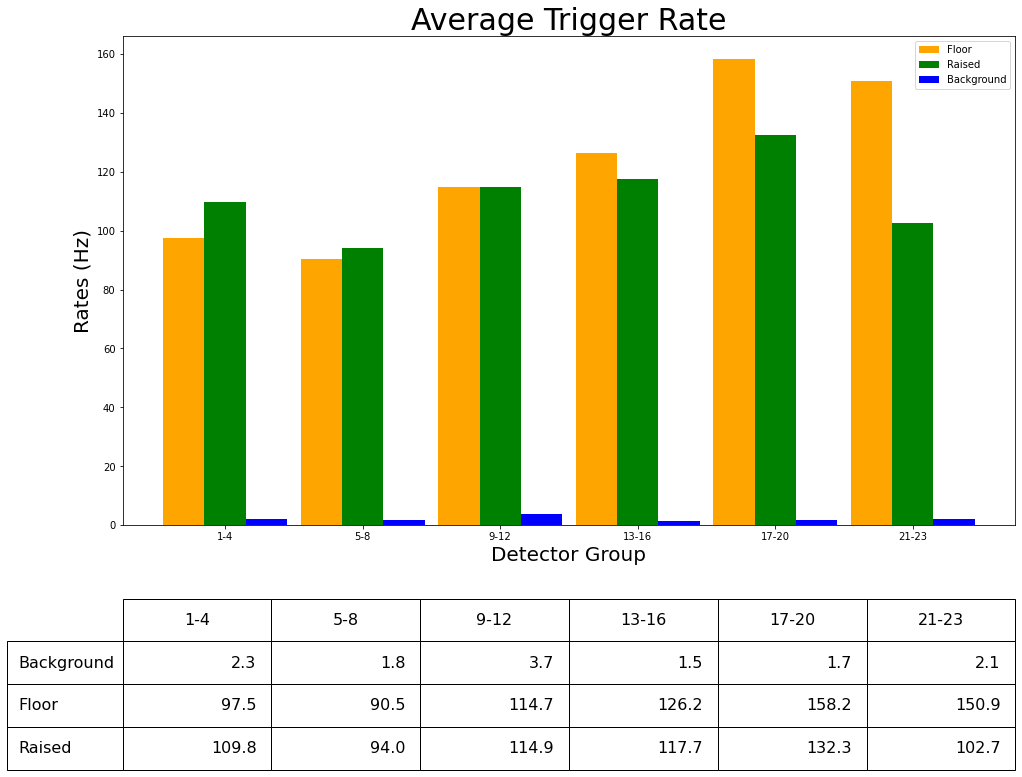

In [3]:
#Convert our data to a nice table.
table_text = []
for row in table_data:
    table_text.append(["{:.1f}".format(x) for x in row])

x_axis = np.arange(len(column_labels))
    
plt.figure(figsize=(16,9))

plt.bar(x_axis - 0.3,table_data[1],0.3,label="Floor",color='orange')
plt.bar(x_axis,table_data[2],0.3,label="Raised",color='green')
plt.bar(x_axis+0.3,table_data[0],0.3,label="Background",color='blue')
table = plt.table(table_text,rowLabels=row_labels,colLabels=column_labels,bbox=[0,-0.5,1,0.35])

table.auto_set_font_size(False)
table.set_fontsize(16)
plt.xticks(x_axis,column_labels)
plt.xlabel("Detector Group",size=20)
plt.ylabel("Rates (Hz)",size=20)
plt.title("Average Trigger Rate",size=30)

plt.legend()
plt.show()

*Note: Lower threshold was 4337, and upper threshold was 142000.*

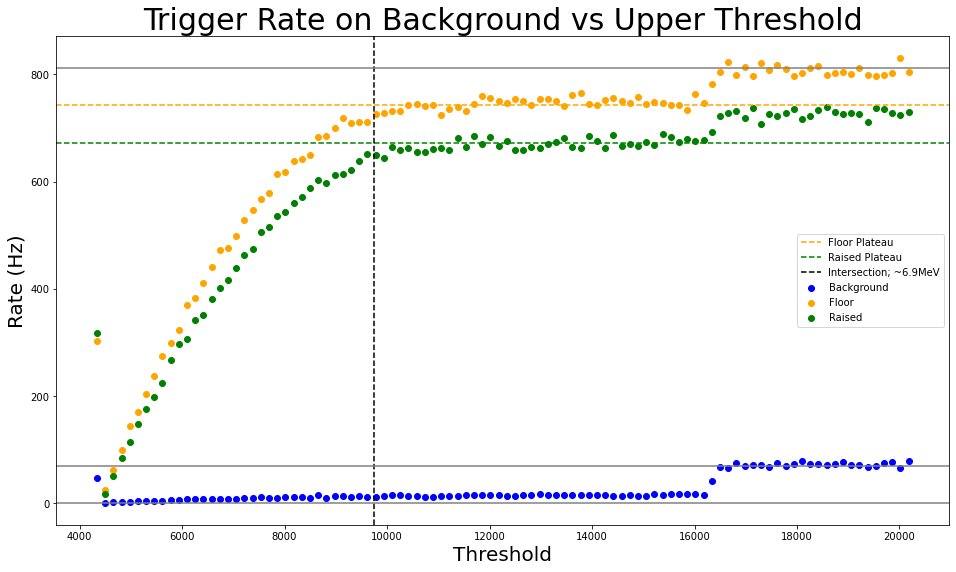

In [4]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_bg_2,label='Background',color='blue')
plt.scatter(threshold,rate_floor,label='Floor',color='orange')
plt.scatter(threshold,rate_raised,label='Raised',color='green')
#plt.scatter(threshold_1,rate_bg,label='Background (First run)')
plt.axhline(742,label="Floor Plateau",linestyle='dashed',color='orange')
plt.axhline(672,label="Raised Plateau",linestyle='dashed',color='green')
plt.axvline(9750,label="Intersection; ~6.9MeV",linestyle='dashed',color='black')
plt.axhline(0,color='grey')
plt.axhline(742-672,color='grey')
plt.axhline(742+742-672,color='grey')
#plt.axvline(10000,label="Raised intersection",linestyle='dashed',color='green')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.legend()
plt.show()

*Note: Lower threshold was 4337.*